<a href="https://colab.research.google.com/github/shubham62025865/deeplearning/blob/main/Text_Preprocessing_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

- Removing punctuations like . , ! $( ) * % @
- Removing URLs
- Removing Stop words
- Lower casing
- Tokenization
- Stemming
- Lemmatization

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

# Steps to clean the data



## URL remove


In [ ]:
df = data[["text", "target"]]
df.iloc[5:10]

,text,target
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


In [ ]:
df.iloc[48]["text"]

'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw'

In [ ]:
import re

text = "Check these out: http://t.co/rOI2NSmEJJ https://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw"

# Define a regular expression pattern to match URLs
# url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

url_pattern = r"https?://\S+"

# Use re.sub to replace all matched URLs with an empty string
cleaned_text = re.sub(url_pattern, '', text)

print(cleaned_text)

Check these out:     #nsfw


In [ ]:
def url_removal(text):
  url_pattern = r"https?://\S+"

  clean_text = re.sub(url_pattern, "", text)
  return clean_text

In [ ]:
df["no_url"] = df["text"].apply(lambda x: url_removal(x))

<ipython-input-8-e098fba91314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["no_url"] = df["text"].apply(lambda x: url_removal(x))


In [ ]:
df[["text", "no_url"]].iloc[340:349]

,text,no_url
340,Lee does comedy: ÛÏ@LeeJasper: Working class ...,Lee does comedy: ÛÏ@LeeJasper: Working class ...
341,9 Charts Prove Financial Crisis Part 2 Has BEG...,9 Charts Prove Financial Crisis Part 2 Has BEG...
342,Paul Craig Roberts ÛÒ Vladimir Putin Issues M...,Paul Craig Roberts ÛÒ Vladimir Putin Issues M...
343,@RohnertParkDPS You're on stage now! Right und...,@RohnertParkDPS You're on stage now! Right und...
344,**OFFICIAL VID** #TheReal &gt;&gt;&gt; https:/...,**OFFICIAL VID** #TheReal &gt;&gt;&gt; &gt;&g...
345,Well done Celtic Fingers crossed for Aberdeen ...,Well done Celtic Fingers crossed for Aberdeen ...
346,Beyonce Is my pick for http://t.co/nnMQlz91o9 ...,Beyonce Is my pick for Fan Army #Beyhive 77
347,One Direction Is my pick for http://t.co/q2eBl...,One Direction Is my pick for Fan Army #Direct...
348,5 Seconds of Summer Is my pick for http://t.co...,5 Seconds of Summer Is my pick for Fan Army #...


## Punctuation Removal:

In this step, all the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as

 ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [ ]:
#library that contains punctuation
import string
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
type(punctuation)

str

In [ ]:
text = "#flood #disaster^&#%% Heavy rain c546$#auses flas()&*^&@!#%$^&h flood..."

for chr in text:
  # print(chr)
  if chr in punctuation:
    text = text.replace(chr, "")
text

'flood disaster Heavy rain c546auses flash flood'

In [ ]:
"".join([chr for chr in text if chr not in punctuation])

'flood disaster Heavy rain c546auses flash flood'

In [ ]:
def remove_punctuations(text):
  clean_text = "".join([chr for chr in text if chr not in string.punctuation])
  return clean_text

In [ ]:
df["no_punctuations"] = df["no_url"].apply(lambda x: remove_punctuations(x))

<ipython-input-11-5a6e663ff761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["no_punctuations"] = df["no_url"].apply(lambda x: remove_punctuations(x))


In [ ]:
df[["text", "no_url", "no_punctuations"]].iloc[340:349]

,text,no_url,no_punctuations
340,Lee does comedy: ÛÏ@LeeJasper: Working class ...,Lee does comedy: ÛÏ@LeeJasper: Working class ...,Lee does comedy ÛÏLeeJasper Working class Tor...
341,9 Charts Prove Financial Crisis Part 2 Has BEG...,9 Charts Prove Financial Crisis Part 2 Has BEG...,9 Charts Prove Financial Crisis Part 2 Has BEG...
342,Paul Craig Roberts ÛÒ Vladimir Putin Issues M...,Paul Craig Roberts ÛÒ Vladimir Putin Issues M...,Paul Craig Roberts ÛÒ Vladimir Putin Issues M...
343,@RohnertParkDPS You're on stage now! Right und...,@RohnertParkDPS You're on stage now! Right und...,RohnertParkDPS Youre on stage now Right under ...
344,**OFFICIAL VID** #TheReal &gt;&gt;&gt; https:/...,**OFFICIAL VID** #TheReal &gt;&gt;&gt; &gt;&g...,OFFICIAL VID TheReal gtgtgt gtgtgt TrubGME gt...
345,Well done Celtic Fingers crossed for Aberdeen ...,Well done Celtic Fingers crossed for Aberdeen ...,Well done Celtic Fingers crossed for Aberdeen ...
346,Beyonce Is my pick for http://t.co/nnMQlz91o9 ...,Beyonce Is my pick for Fan Army #Beyhive 77,Beyonce Is my pick for Fan Army Beyhive 77
347,One Direction Is my pick for http://t.co/q2eBl...,One Direction Is my pick for Fan Army #Direct...,One Direction Is my pick for Fan Army Directi...
348,5 Seconds of Summer Is my pick for http://t.co...,5 Seconds of Summer Is my pick for Fan Army #...,5 Seconds of Summer Is my pick for Fan Army 5...


In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_text']= data['text'].apply(lambda x:remove_punctuation(x))
data.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


## Lowering the text:

It is one of the most common text preprocessing Python steps where the text is converted into the same case preferably lower case. But it is not necessary to do this step every time you are working on an NLP problem as for some problems lower casing can lead to loss of information.

For example, if in any project we are dealing with the emotions of a person, then the words written in upper cases can be a sign of frustration or excitement.

In [ ]:
cc

In [ ]:
df[["text","text_lower"]].iloc[340:349]

,text,text_lower
340,Lee does comedy: ÛÏ@LeeJasper: Working class ...,lee does comedy ûïleejasper working class tor...
341,9 Charts Prove Financial Crisis Part 2 Has BEG...,9 charts prove financial crisis part 2 has beg...
342,Paul Craig Roberts ÛÒ Vladimir Putin Issues M...,paul craig roberts ûò vladimir putin issues m...
343,@RohnertParkDPS You're on stage now! Right und...,rohnertparkdps youre on stage now right under ...
344,**OFFICIAL VID** #TheReal &gt;&gt;&gt; https:/...,official vid thereal gtgtgt gtgtgt trubgme gt...
345,Well done Celtic Fingers crossed for Aberdeen ...,well done celtic fingers crossed for aberdeen ...
346,Beyonce Is my pick for http://t.co/nnMQlz91o9 ...,beyonce is my pick for fan army beyhive 77
347,One Direction Is my pick for http://t.co/q2eBl...,one direction is my pick for fan army directi...
348,5 Seconds of Summer Is my pick for http://t.co...,5 seconds of summer is my pick for fan army 5...


In [ ]:
data.head()

,id,keyword,location,text,target,clean_text,text_lower
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,just got sent this photo from ruby alaska as s...


## Tokenization:

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download("popular")

In [ ]:
from nltk.tokenize import word_tokenize

sentence = "Books are on the table"

words = word_tokenize(sentence)
print(words)

['Books', 'are', 'on', 'the', 'table']


In [ ]:
from nltk.tokenize import word_tokenize

a = word_tokenize(df["text_lower"][45])
type(a)

list

In [ ]:
a

['i',
 'gained',
 '3',
 'followers',
 'in',
 'the',
 'last',
 'week',
 'you',
 'know',
 'your',
 'stats',
 'and',
 'grow',
 'with']

In [ ]:
df["text_token"] = df["text_lower"].apply(lambda x: word_tokenize(x))

In [ ]:
df[["text", "text_token"]]

,text,text_token
0,Our Deeds are the Reason of this #earthquake M...,"[our, deeds, are, the, reason, of, this, earth..."
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...","[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...
7608,Two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, a, bridge, colla..."
7609,@aria_ahrary @TheTawniest The out of control w...,"[ariaahrary, thetawniest, the, out, of, contro..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m194, 0104, utc5km, s, of, volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,"[police, investigating, after, an, ebike, coll..."


In [ ]:
#defining function for tokenization
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
#applying function to the column
data['text_tokenied']= data['text_lower'].apply(lambda x: tokenization(x))

In [ ]:
data[["text_lower", "text_tokenied"]]

,text_lower,text_tokenied
0,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...
7608,two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, a, bridge, colla..."
7609,ariaahrary thetawniest the out of control wild...,"[ariaahrary, thetawniest, the, out, of, contro..."
7610,m194 0104 utc5km s of volcano hawaii httptcozd...,"[m194, 0104, utc5km, s, of, volcano, hawaii, h..."
7611,police investigating after an ebike collided w...,"[police, investigating, after, an, ebike, coll..."


In [ ]:
data["text_tokenied"][3]

['13000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'in',
 'california']

## Stop word removal:

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

NLTK library consists of a list of words that are considered stopwords for the English language. Some of them are :

>[ i, me, my, myself, we, our, ours, ourselves, you, you’re, you’ve, you’ll, you’d, your, yours, yourself, yourselves, he, most, other, some, such, no, nor, not, only, own, same, so, then, too, very, s, t, can, will, just, don, don’t, should, should’ve, now, d, ll, m, o, re, ve, y, ain, aren’t, could, couldn’t, didn’t, didn’t ]

But it is not necessary to use the provided list as stopwords as they should be chosen wisely based on the project. For example, ‘How’ can be a stop word for a model but can be important for some other problem where we are working on the queries of the customers. We can create a customized list of stop words for different problems.

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
type(stop_words)

list

In [ ]:
len(stop_words)

179

In [ ]:
text = "But it is not necessary to use the provided list"
text = text.lower()
text_token = word_tokenize(text)
text_token

['but', 'it', 'is', 'not', 'necessary', 'to', 'use', 'the', 'provided', 'list']

In [ ]:
[word for word in text_token if word not in stop_words]

['necessary', 'use', 'provided', 'list']

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sentence = "Machine Learning is cool!"

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(sentence)

filtered_sentence = [w for w in word_tokens if w not in stop_words]
print(filtered_sentence)

['Machine', 'Learning', 'cool', '!']


In [ ]:
#Stop words present in the library
stopwords_english = nltk.corpus.stopwords.words('english')
stopwords_english[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def remove_stopwords(text_list):
  clean_list = [word for word in text_list if word not in nltk.corpus.stopwords.words('english')]
  return clean_list

In [ ]:
df["no_stopwords"] = df["text_token"].apply(lambda x: remove_stopwords(x))

In [ ]:
df.head()

,text,target,no_url,no_punctuations,text_lower,text_token,no_stopwords
0,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords_english]
    return output

In [ ]:
#applying the function
data['no_stopwords']= data['text_tokenied'].apply(lambda x:remove_stopwords(x))

In [ ]:
data[["text_tokenied", "no_stopwords"]].head()

,text_tokenied,no_stopwords
0,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


## Stemming:

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.

But the disadvantage of stemming is that it stems the words such that its root form loses the meaning or it is not diminished to a proper English word.

In [ ]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

sentence = "Machine Learning is cool"

for word in sentence.split():
  print(ps.stem(word))

machin
learn
is
cool


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# test = ["play", "playing", "played"]
text = "But the disadvantage of stemming is that it stems"
text = text.lower()
text = word_tokenize(text)

for word in text:
  stem_word = ps.stem(word)
  print(f"{word} --> {stem_word}")

In [ ]:
ps = PorterStemmer()
def stemming(text_list):

  stem_list = [ps.stem(word) for word in text_list]

  return stem_list

In [ ]:
df["text_stemming"] = df["no_stopwords"].apply(lambda x: stemming(x))

In [ ]:
df[["text", "text_stemming"]]

,text,text_stemming
0,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,Just got sent this photo from Ruby #Alaska as ...,"[got, sent, photo, rubi, alaska, smoke, wildfi..."
...,...,...
7608,Two giant cranes holding a bridge collapse int...,"[two, giant, crane, hold, bridg, collaps, near..."
7609,@aria_ahrary @TheTawniest The out of control w...,"[ariaahrari, thetawniest, control, wild, fire,..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m194, 0104, utc5km, volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,"[polic, investig, ebik, collid, car, littl, po..."


In [ ]:
#defining a function for stemming
def stemming(text):
  stem_text = [ps.stem(word) for word in text]
  return stem_text
data['text_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))

In [ ]:
data[["no_stopwords","text_stemmed"]].head()

,no_stopwords,text_stemmed
0,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,"[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


## Lemmatization:

Unlike stemming, lemmatization reduces the words to a word existing in the language.

Either Stemming or Lemmatization can be used. Libraries such as nltk, and spaCy have stemmers and lemmatizers implemented. These are built based on a rule-based approach.

Stemmer is easy to build than a lemmatizer as the latter requires deep linguistics knowledge in constructing dictionaries to look up the lemma of the word.

Lemmatization is preferred over Stemming because lemmatization does a morphological analysis of the words.

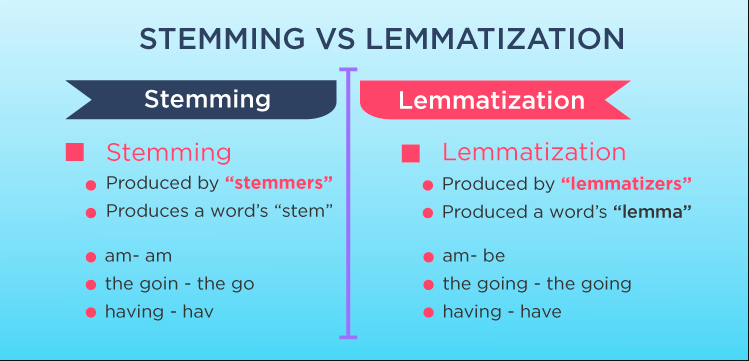

In [ ]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
wnl = WordNetLemmatizer()
# test = ["play", "playing", "played"]
text = "But the disadvantage of stemming is that it stems"
text = text.lower()
text = word_tokenize(text)

for word in text:
  stem_word = ps.stem(word)
  lemma_word = wnl.lemmatize(word)
  print(f"{word} --> {stem_word} ---> {lemma_word}")

but --> but ---> but
the --> the ---> the
disadvantage --> disadvantag ---> disadvantage
of --> of ---> of
stemming --> stem ---> stemming
is --> is ---> is
that --> that ---> that
it --> it ---> it
stems --> stem ---> stem


In [ ]:
wnl = WordNetLemmatizer()
def lemmatization(text_list):
  lemma_list = []
  for word in text_list:
    lemma = wnl.lemmatize(word)
    lemma_list.append(lemma)
  return (lemma_list)

In [ ]:
df["text_lemma"] = df["no_stopwords"].apply(lambda x: lemmatization(x))

In [ ]:
df[["text", "text_stemming", "text_lemma"]]

,text,text_stemming,text_lemma
0,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,Just got sent this photo from Ruby #Alaska as ...,"[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,"[two, giant, crane, hold, bridg, collaps, near...","[two, giant, crane, holding, bridge, collapse,..."
7609,@aria_ahrary @TheTawniest The out of control w...,"[ariaahrari, thetawniest, control, wild, fire,...","[ariaahrary, thetawniest, control, wild, fire,..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m194, 0104, utc5km, volcano, hawaii]","[m194, 0104, utc5km, volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,"[polic, investig, ebik, collid, car, littl, po...","[police, investigating, ebike, collided, car, ..."


In [ ]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
data['text_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))

In [ ]:
data[["no_stopwords","text_stemmed","text_lemmatized"]].tail()

,no_stopwords,text_stemmed,text_lemmatized
7608,"[two, giant, cranes, holding, bridge, collapse...","[two, giant, crane, hold, bridg, collaps, near...","[two, giant, crane, holding, bridge, collapse,..."
7609,"[ariaahrary, thetawniest, control, wild, fires...","[ariaahrari, thetawniest, control, wild, fire,...","[ariaahrary, thetawniest, control, wild, fire,..."
7610,"[m194, 0104, utc5km, volcano, hawaii, httptcoz...","[m194, 0104, utc5km, volcano, hawaii, httptcoz...","[m194, 0104, utc5km, volcano, hawaii, httptcoz..."
7611,"[police, investigating, ebike, collided, car, ...","[polic, investig, ebik, collid, car, littl, po...","[police, investigating, ebike, collided, car, ..."
7612,"[latest, homes, razed, northern, california, w...","[latest, home, raze, northern, california, wil...","[latest, home, razed, northern, california, wi..."
